<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/SplitPatients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign7: Outliers/outlier_missfr.xlsx')
df

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,4.9248,194.24,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,5.1634,251.46,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,9.4100,313.00,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,4.3718,204.65,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,5.4200,434.00,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,10.3200,306.00,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,9.5600,361.00,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,4.6100,131.00,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,9.4400,305.00,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1


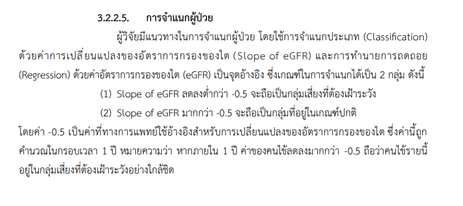

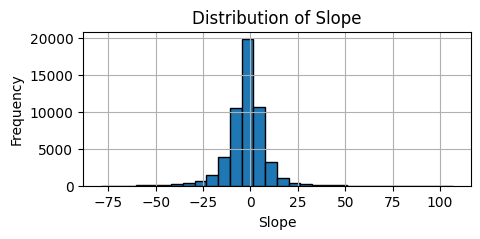

In [3]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(5, 2))
plt.hist(df['Slopes'], bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Slope')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope >-0.5:
        return 'better'
    else:
        return 'worse'
df['Group'] = df['Slopes'].apply(categorize_slope)

In [5]:
df['Group'].value_counts()

worse     30373
better    22247
Name: Group, dtype: int64

In [6]:
df1 = df.copy()

In [7]:
df = df1.copy()

**แบ่ง 5 fold โดยไม่ให้ผู้ป่วย cross fold และพยายามกระจายทั้ง worse และ better ให้มีสัดส่วนเท่ากันในทุก fold**

In [8]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
df.sort_values(by=['PatientUID', 'Slopes'], inplace=True)

# Initialize empty lists for 5 folds
num_folds = 5
folds = [[] for _ in range(num_folds)]

# Initialize a dictionary to keep track of which patients are in each fold
patients_in_folds = {fold_index: set() for fold_index in range(num_folds)}

# Initialize variables to keep track of the current fold and patient
current_fold = 0
current_patient = None

# Loop through the DataFrame
for index, row in df.iterrows():
    patient_uid = row['PatientUID']
    slope = row['Slopes']
    group = row['Group']

    # Check if it's a new patient
    if patient_uid != current_patient:
        # Move to the next fold
        current_fold += 1

        # If we've reached the end, go back to the first fold
        if current_fold >= num_folds:
            current_fold = 0

        # Update the current patient
        current_patient = patient_uid

        # Add the patient to the current fold
        patients_in_folds[current_fold].add(current_patient)

    # Check the Group condition and assign to the current fold
    if group == 'better' and 'better' not in patients_in_folds[current_fold]:
        folds[current_fold].append(index)
        patients_in_folds[current_fold].add(current_patient)
    elif group == 'worse' and 'worse' not in patients_in_folds[current_fold]:
        folds[current_fold].append(index)
        patients_in_folds[current_fold].add(current_patient)

# If there are imbalances in the folds due to rounding, distribute the remaining patients
remaining_patients = set(df['PatientUID']) - set.union(*patients_in_folds.values())
remaining_patients = np.random.permutation(list(remaining_patients))

for patient_uid in remaining_patients:
    fold_index = np.argmin([len(patients) for patients in patients_in_folds.values()])
    folds[fold_index].append(df[df['PatientUID'] == patient_uid].index[0])
    patients_in_folds[fold_index].add(patient_uid)

# Add a new column 'folds' to the DataFrame
df['Fold'] = np.nan

# Assign fold values to the 'Fold' column
for fold_index, fold_indices in enumerate(folds):
    df.loc[fold_indices, 'Fold'] = fold_index

In [9]:
# Check if any patient is in multiple folds
for fold_index, patient_set in patients_in_folds.items():
    for other_fold_index in range(fold_index + 1, 5):  # Optimize by avoiding duplicate checks
        other_patient_set = patients_in_folds[other_fold_index]
        common_patients = patient_set.intersection(other_patient_set)
        if common_patients:
            print(f"Error: Patients {common_patients} are in multiple folds ({fold_index + 1} and {other_fold_index + 1})")

# If no errors are printed, it means each patient is in only one fold


> **1 Patient already is in only 1 fold /// not cross**

In [10]:
df[['PatientUID','PatientVisitUID','Slopes','Group','Fold']]

,PatientUID,PatientVisitUID,Slopes,Group,Fold
3,2299,6947220,-12.812245,worse,1.0
0,2299,3386255,-7.158596,worse,1.0
2,2299,5812902,-6.063710,worse,1.0
1,2299,4546471,5.550691,better,1.0
4,2299,8186767,28.287500,better,1.0
...,...,...,...,...,...
52615,3319961,9270330,-4.256753,worse,4.0
52616,3319971,9270331,-0.692078,worse,0.0
52617,3320048,9242721,7.217875,better,1.0
52618,3320050,9257281,-32.794557,worse,2.0


> **check how 'Group' assigned**


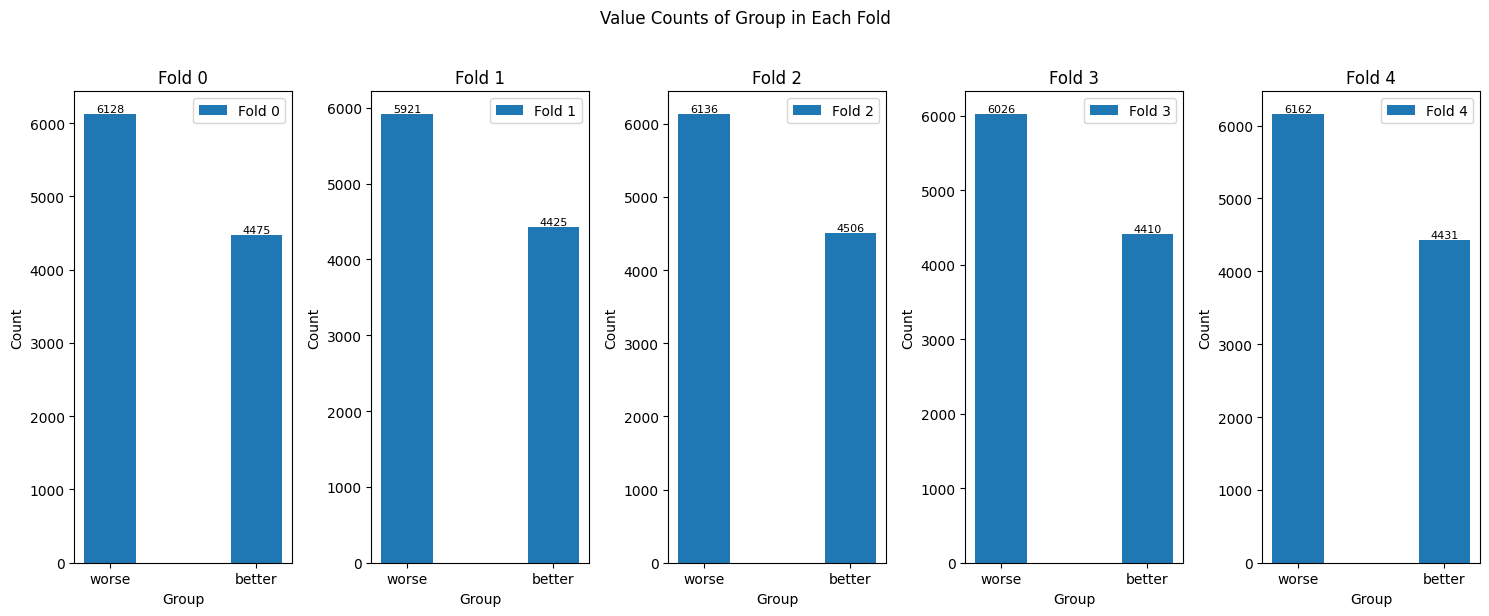

In [11]:
import matplotlib.pyplot as plt
import numpy as np

num_folds = 5
fig, axes = plt.subplots(nrows=1, ncols=num_folds, figsize=(15, 6))  # Use subplots to create separate axes for each fold

bar_width = 0.35
for fold_index, ax in enumerate(axes):
    fold_df = df[df['Fold'] == fold_index]
    group_value_counts = fold_df['Group'].value_counts()

    bar_positions = np.arange(len(group_value_counts))  # Adjust the positions of the bars based on the number of unique groups

    bars = ax.bar(bar_positions, group_value_counts.values, width=bar_width, label=f'Fold {fold_index}')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(group_value_counts.index)
    ax.set_xlabel('Group')
    ax.set_ylabel('Count')
    ax.legend()
    ax.set_title(f'Fold {fold_index}')
    for bar, count in zip(bars, group_value_counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                ha='center', va='bottom', fontsize=8, color='black')
plt.suptitle('Value Counts of Group in Each Fold', y=1.02)
plt.tight_layout()
plt.show()

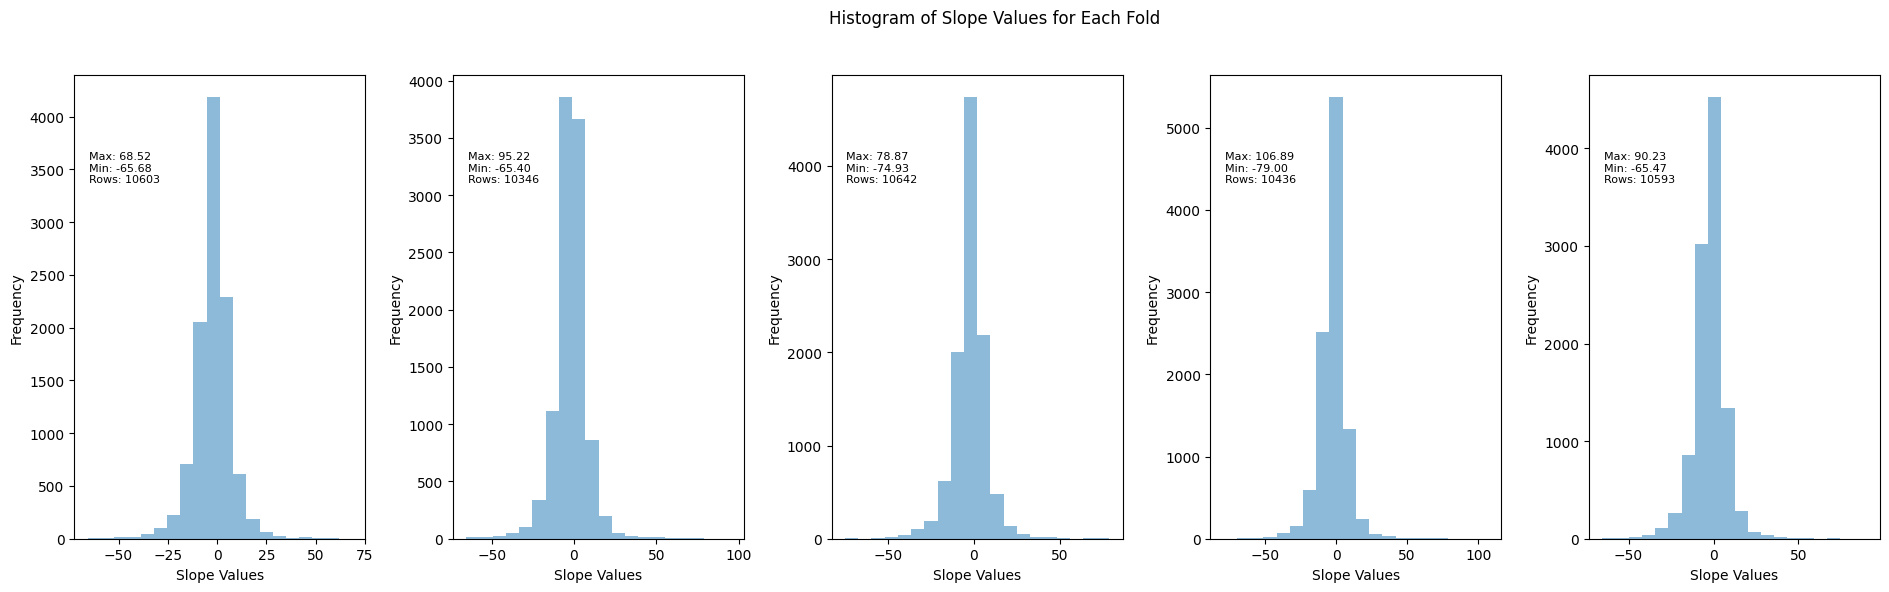

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and folds is a list of fold indices

# Function to add details to the right of the plot
def add_details(ax, data):
    ax.annotate(f'Max: {data.max():.2f}\nMin: {data.min():.2f}\nRows: {len(data)}',
                xy=(.05, 0.8), xycoords='axes fraction',
                ha='left', va='center', fontsize=8,
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

# Plot overlapping histograms for each fold
plt.figure(figsize=(20, 6))

for fold_idx, fold in enumerate(folds):
    fold_data = df.loc[fold, 'Slopes']

    plt.subplot(1, len(folds), fold_idx + 1)
    plt.hist(fold_data, alpha=0.5, bins=20)

    # Call the function to add details
    add_details(plt.gca(), fold_data)

    plt.xlabel('Slope Values', ha='center')  # Set horizontal alignment to 'center'
    plt.ylabel('Frequency')

plt.suptitle('Histogram of Slope Values for Each Fold')
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()
